Model Trained Successfully!
RMSE: 56031.94809603212
R2 Score: 0.5906850474632174


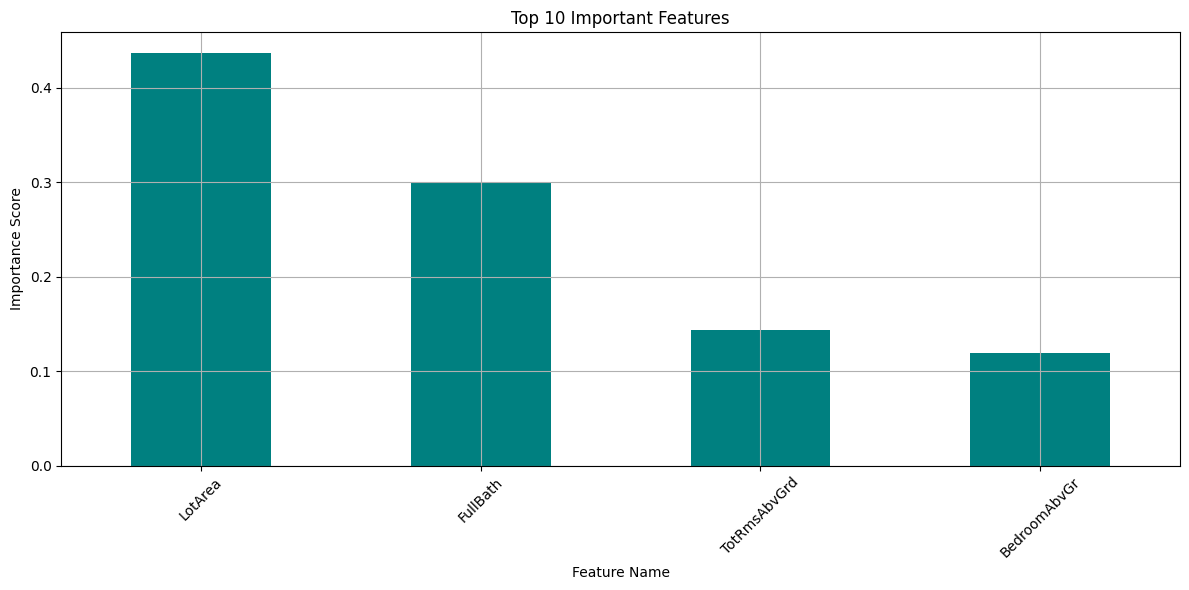

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


df = pd.read_csv("house_prices.csv")


df = df[['LotArea', 'BedroomAbvGr', 'FullBath', 'TotRmsAbvGrd', 'SalePrice']]


df = df.dropna()


X = df.drop('SalePrice', axis=1)  # Features
y = df['SalePrice']  # Target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


joblib.dump(model, 'house_price_model.pkl')  # Model
joblib.dump(scaler, 'scaler.pkl')

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Trained Successfully!")
print("RMSE:", rmse)
print("R2 Score:", r2)


importances = model.feature_importances_
features = X.columns
importance_df = pd.Series(importances, index=features).sort_values(ascending=False)


plt.figure(figsize=(12, 6))
importance_df.head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Important Features")
plt.ylabel("Importance Score")
plt.xlabel("Feature Name")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
